# **Modeling and Predicting Housing Prices in King County, USA: Analyzing House Sales Data**



Author: Hazman Naim

# 1. Collect and Prepare Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [14]:
df = pd.read_csv('kc_house_data_NaN.csv')

In [15]:
df.head()

Unnamed: 0          id             date     price  bedrooms  bathrooms  \
0           0  7129300520  20141013T000000  221900.0       3.0       1.00   
1           1  6414100192  20141209T000000  538000.0       3.0       2.25   
2           2  5631500400  20150225T000000  180000.0       2.0       1.00   
3           3  2487200875  20141209T000000  604000.0       4.0       3.00   
4           4  1954400510  20150218T000000  510000.0       3.0       2.00   

   sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
0         1180      5650     1.0           0  ...      7        1180   
1         2570      7242     2.0           0  ...      7        2170   
2          770     10000     1.0           0  ...      6         770   
3         1960      5000     1.0           0  ...      7        1050   
4         1680      8080     1.0           0  ...      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 22 columns]

# 2. Exploratory Data Analysis

## Data Cleaning

In [16]:
df.isnull().sum()

Unnamed: 0        0
id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

1. Drop columns "Unnamed: 0" and "date".
2. 13 missing values in "bedrooms" column and 10 missing values in "bathrooms" column.

In [17]:
df.drop(["id","Unnamed: 0"], axis=1, inplace=True)

In [18]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [19]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  float64
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

## Correlation and Relationship

In [ ]:
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(df.sample(1000),height=4)
g.set(xticklabels=[]);

<Axes: title={'center': 'Pearson Correlation of features'}>

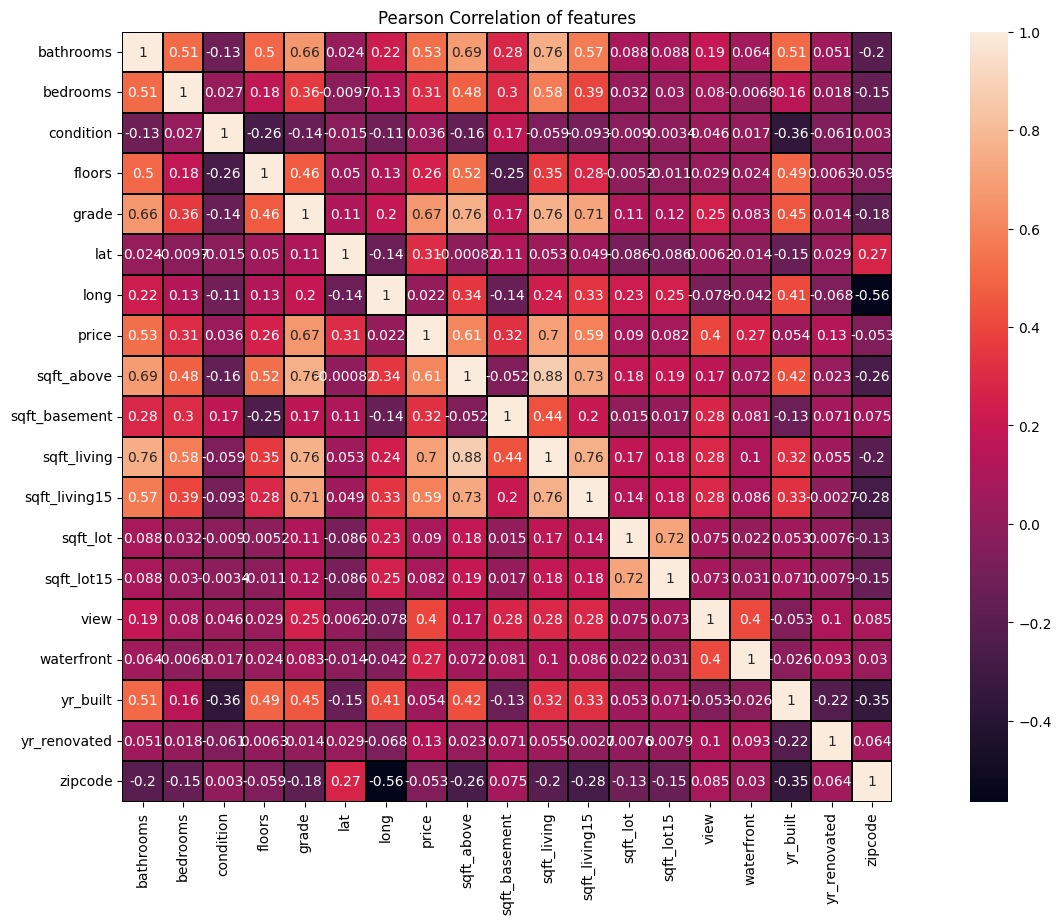

In [ ]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df.items():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion
num_list = df.columns.difference(str_list)
# Create Dataframe containing only numerical features
house_num = df[num_list]
f, ax = plt.subplots(figsize=(20, 10))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, linecolor='k', annot=True)

In [21]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

## Feature Selection

We are selecting numerical features which have more than 0.50 or less than -0.50 correlation rate based on Pearson Correlation Method.

In [22]:
important_cols = list(df.corr()["price"][(df.corr()["price"]>0.5) | (df.corr()["price"]<-0.50)].index)

df1 = df[important_cols]

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   grade          21613 non-null  int64  
 4   sqft_above     21613 non-null  int64  
 5   sqft_living15  21613 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1013.2 KB


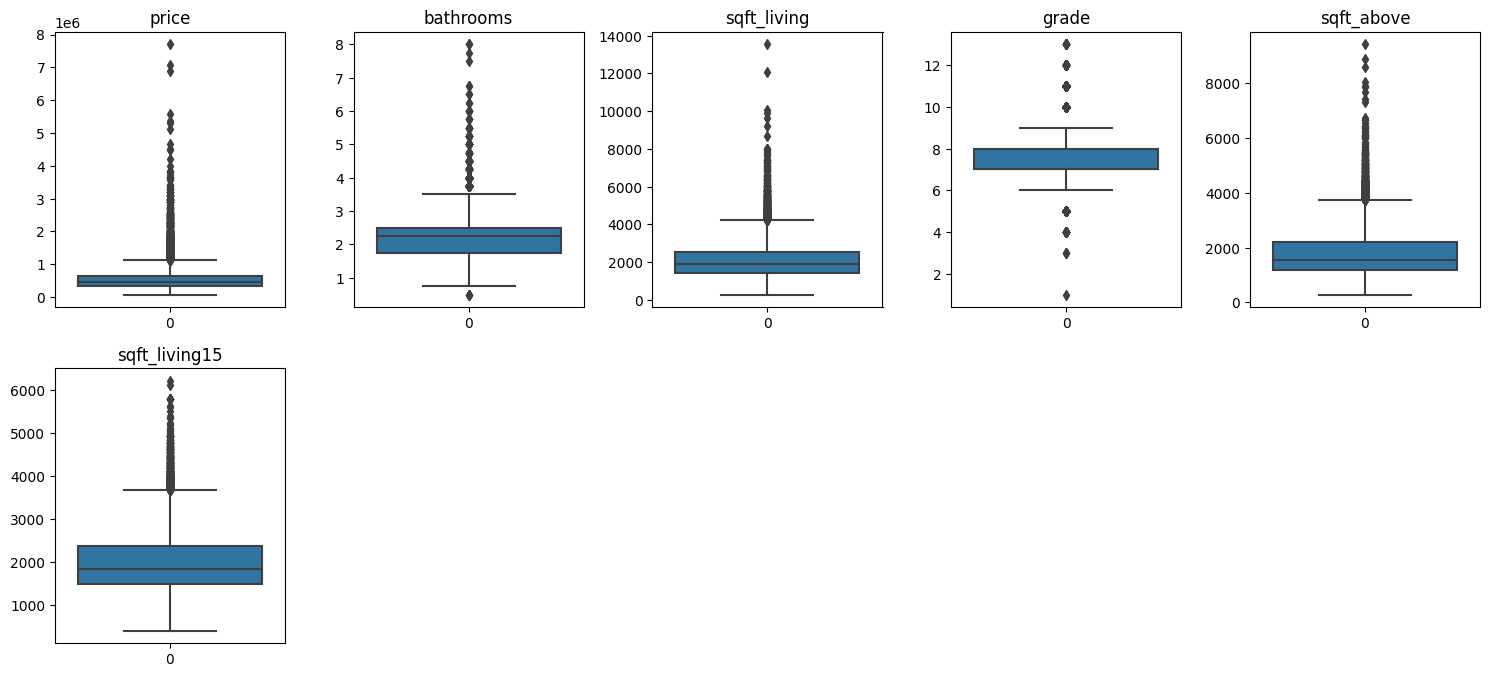

In [24]:
# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing

# Flatten the 2D array of axes for easier iteration
axes = axes.flatten()

# Columns to create boxplots for
columns = ['price','bathrooms', 'sqft_living',
          'grade', 'sqft_above',
          'sqft_living15'
          ]

# Create boxplots
for i, column in enumerate(columns):
    sns.boxplot(df[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('')  # Remove x-label for better spacing

# Remove any unused subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Display the plot
plt.tight_layout()
plt.show()

## Standardization

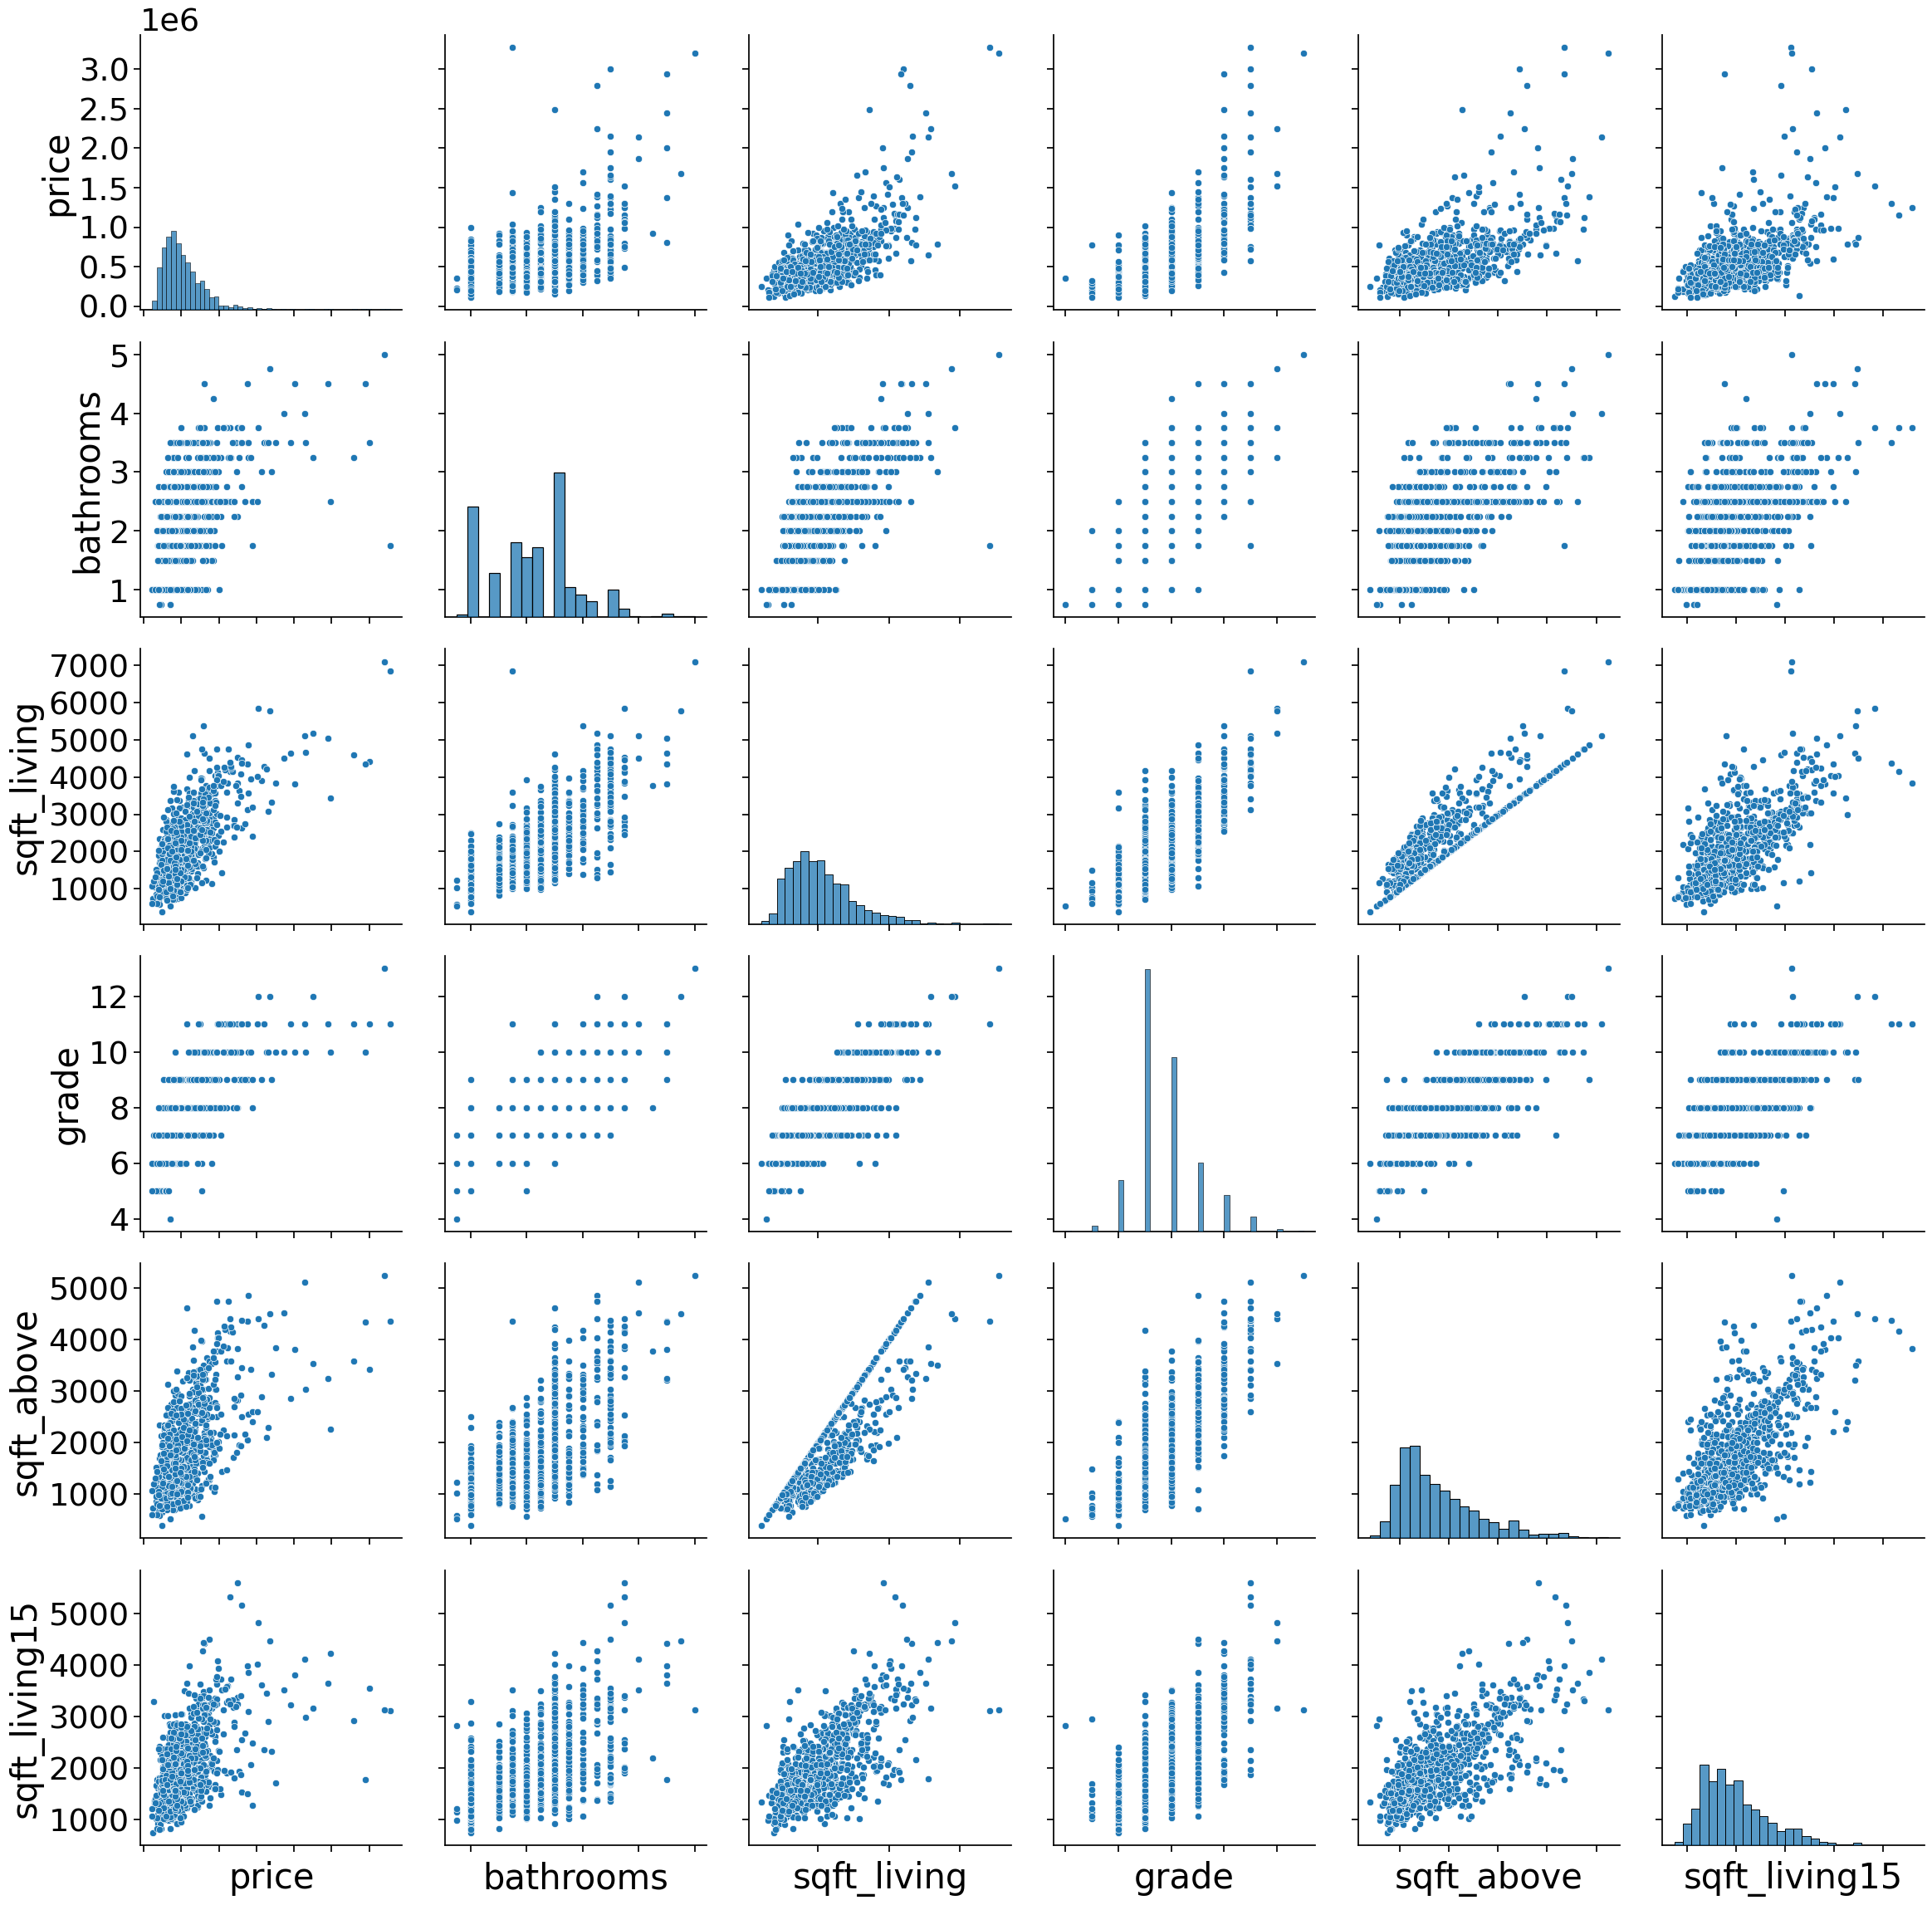

In [7]:
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(df1.sample(1000),height=4)
g.set(xticklabels=[]);

In [25]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
df_scaled = scaler.fit_transform(df1)

# Convert the scaled result back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df1.columns)

df_scaled.head()

price  bathrooms  sqft_living     grade  sqft_above  sqft_living15
0 -0.866717  -1.451270    -0.979835 -0.558836   -0.734708      -0.943355
1 -0.005688   0.174641     0.533634 -0.558836    0.460841      -0.432686
2 -0.980849  -1.451270    -1.426254 -1.409587   -1.229834       1.070140
3  0.174090   1.150187    -0.130550 -0.558836   -0.891699      -0.914174
4 -0.081958  -0.150541    -0.435422  0.291916   -0.130895      -0.272190

# 3. Model Development

In [26]:
models_table = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","Cross-Validated RMSE","Cross-Validated R2 Score"])
models_table = pd.DataFrame(columns=models_table.columns)
models_table.head()

Empty DataFrame
Columns: [Model, MAE, MSE, RMSE, R2 Score, Cross-Validated RMSE, Cross-Validated R2 Score]
Index: []

In [27]:
from sklearn.model_selection import train_test_split

x_data = df_scaled.drop("price", axis=1)
y_data = df_scaled["price"]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 2162
number of training samples: 19451


In [28]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

def cross_fold(model):
    Rcross = cross_val_score(model, x_data, y_data, cv=5).mean()
    RMSEcross = np.sqrt(-cross_val_score(model,x_data, y_data, scoring="neg_mean_squared_error", cv=4)).mean()
    return Rcross, RMSEcross

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

## Simple Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()

X1 = x_train[['sqft_living']]
Y1 = y_train

slr.fit(X1,Y1)
predictions = slr.predict(x_test[['sqft_living']])

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("-"*30)
print("SIMPLE LINEAR REGRESSION")
print("-"*30)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

Rcross = cross_val_score(slr, x_data[['sqft_living']], y_data, cv=4).mean()
RMSEcross = np.sqrt(-cross_val_score(slr,x_data[['sqft_living']], y_data, scoring="neg_mean_squared_error", cv=4)).mean()
print("RMSE Cross-Validation:", RMSEcross)
print("R2 Score Cross-Validation:", Rcross)

new_row = {"Model": "Simple Linear Regression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "Cross-Validated RMSE": RMSEcross, "Cross-Validated R2 Score": Rcross }
models_table = models_table.append(new_row, ignore_index=True)

------------------------------
SIMPLE LINEAR REGRESSION
------------------------------
MAE: 0.4865387247612535
MSE: 0.6130633546530333
RMSE: 0.7829836234896828
R2 Score: 0.48489043226442785
------------------------------
RMSE Cross-Validation: 0.7120485859904259
R2 Score Cross-Validation: 0.4921577814175951


## Multiple Linear Regression

In [30]:
mlr = LinearRegression()

X1 = x_train
Y1 = y_train

mlr.fit(X1,Y1)
predictions = mlr.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("-"*30)
print("MULTIPLE LINEAR REGRESSION")
print("-"*30)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

Rcross, RMSEcross = cross_fold(mlr)
print("RMSE Cross-Validation:", RMSEcross)
print("R2 Score Cross-Validation:", Rcross)

new_row = {"Model": "Multiple Linear Regression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "Cross-Validated RMSE": RMSEcross, "Cross-Validated R2 Score": Rcross }
models_table = models_table.append(new_row, ignore_index=True)

------------------------------
MULTIPLE LINEAR REGRESSION
------------------------------
MAE: 0.44592609170641145
MSE: 0.5547371699520437
RMSE: 0.7448068004201114
R2 Score: 0.5338973995883771
------------------------------
RMSE Cross-Validation: 0.6762189514307718
R2 Score Cross-Validation: 0.5412849636159995


## Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(random_state=1)

forest_model.fit(x_train, y_train)
predictions_rfm = forest_model.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions_rfm)
print("-"*30)
print("RANDOM FOREST REGRESSOR")
print("-"*30)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

Rcross, RMSEcross = cross_fold(forest_model)
print("RMSE Cross-Validation:", RMSEcross)
print("R2 Score Cross-Validation:", Rcross)

new_row = {"Model": "Random Forest Regressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "Cross-Validated RMSE": RMSEcross, "Cross-Validated R2 Score": Rcross }
models_table = models_table.append(new_row, ignore_index=True)

------------------------------
RANDOM FOREST REGRESSOR
------------------------------
MAE: 0.4096338442302989
MSE: 0.4334820794002716
RMSE: 0.6583935596588651
R2 Score: 0.6357786436813475
------------------------------
RMSE Cross-Validation: 0.6502137094577848
R2 Score Cross-Validation: 0.5847388264105045


## Support Vector Regression

In [32]:
from sklearn import svm

svr = svm.SVR()

svr.fit(x_train, y_train)
predictions = svr.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("-"*30)
print("SUPPORT VECTOR REGRESSION")
print("-"*30)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

Rcross, RMSEcross = cross_fold(svr)
print("RMSE Cross-Validation:", RMSEcross)
print("R2 Score Cross-Validation:", Rcross)

new_row = {"Model": "Support Vector Regression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "Cross-Validated RMSE": RMSEcross, "Cross-Validated R2 Score": Rcross }
models_table = models_table.append(new_row, ignore_index=True)


------------------------------
SUPPORT VECTOR REGRESSION
------------------------------
MAE: 0.3961933081621406
MSE: 0.5342494307852423
RMSE: 0.7309236832838585
R2 Score: 0.5511116571132997
------------------------------
RMSE Cross-Validation: 0.6540135272749326
R2 Score Cross-Validation: 0.5740998170594528


## Ridge Regression

In [33]:
from sklearn.linear_model import Ridge

rm = Ridge()

rm.fit(x_train, y_train)
predictions = rm.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("-"*30)
print("RIDGE REGRESSION")
print("-"*30)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

Rcross, RMSEcross = cross_fold(rm)
print("RMSE Cross-Validation:", RMSEcross)
print("R2 Score Cross-Validation:", Rcross)

new_row = {"Model": "Ridge Regression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "Cross-Validated RMSE": RMSEcross, "Cross-Validated R2 Score": Rcross }
models_table = models_table.append(new_row, ignore_index=True)

------------------------------
RIDGE REGRESSION
------------------------------
MAE: 0.44592487613034076
MSE: 0.5547446909726704
RMSE: 0.7448118493771904
R2 Score: 0.5338910802583201
------------------------------
RMSE Cross-Validation: 0.6762187448835935
R2 Score Cross-Validation: 0.541285876700293


## Model Comparison

In [34]:
models_table

Model       MAE       MSE      RMSE  R2 Score  \
0    Simple Linear Regression  0.486539  0.613063  0.782984  0.484890   
1  Multiple Linear Regression  0.445926  0.554737  0.744807  0.533897   
2     Random Forest Regressor  0.409634  0.433482  0.658394  0.635779   
3   Support Vector Regression  0.396193  0.534249  0.730924  0.551112   
4            Ridge Regression  0.445925  0.554745  0.744812  0.533891   

   Cross-Validated RMSE  Cross-Validated R2 Score  
0              0.712049                  0.492158  
1              0.676219                  0.541285  
2              0.650214                  0.584739  
3              0.654014                  0.574100  
4              0.676219                  0.541286

# 4. Hyperparameter Tuning

## Tuning Random Forest Regressor Model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [300] # number of trees in the random forest
max_features = ['auto', 'log2'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

param_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [ ]:
rfm_random = RandomizedSearchCV(estimator=RandomForestRegressor(),
                                param_distributions=param_grid,
                                scoring='neg_mean_squared_error',
                                cv=4,
                                n_iter=40,
                                n_jobs=-1,
                                random_state=1)

In [ ]:
rfm_random.fit(x_train, y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_iter=40,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=1, scoring='neg_mean_squared_error')

In [ ]:
print ('Random grid: ', param_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rfm_random.best_params_, ' \n')

Random grid:  {'n_estimators': [50, 100, 200, 300], 'max_features': ['auto', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': True}  



In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfm_tuned = RandomForestRegressor(n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=70, bootstrap=True, random_state=1)

rfm_tuned.fit(x_train, y_train)
predictions_rfm_tuned = rfm_tuned.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions_rfm_tuned)
print("-"*30)
print("RANDOM FOREST REGRESSOR (TUNED)")
print("-"*30)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

Rcross, RMSEcross = cross_fold(rfm_tuned)
print("RMSE Cross-Validation:", RMSEcross)
print("R2 Score Cross-Validation:", Rcross)

new_row = {"Model": "Random Forest Regressor (tuned)","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "Cross-Validated RMSE": RMSEcross, "Cross-Validated R2 Score": Rcross }
models_table = models_table.append(new_row, ignore_index=True)

------------------------------
RANDOM FOREST REGRESSOR (TUNED)
------------------------------
MAE: 0.2492763430155344
MSE: 0.21118917740767723
RMSE: 0.45955323675029996
R2 Score: 0.8225541209415992
------------------------------
RMSE Cross-Validation: 0.44112591153525116
R2 Score Cross-Validation: 0.811348037993211


In [ ]:
models_table

Model       MAE       MSE      RMSE  R2 Score  \
0         Simple Linear Regression  0.486539  0.613063  0.782984  0.484890   
1       Multiple Linear Regression  0.376128  0.419628  0.647787  0.647419   
2          Random Forest Regressor  0.248956  0.208861  0.457014  0.824510   
3        Support Vector Regression  0.276419  0.409280  0.639750  0.656114   
4                 Ridge Regression  0.376124  0.419630  0.647789  0.647417   
5  Random Forest Regressor (tuned)  0.249276  0.211189  0.459553  0.822554   

   Cross-Validated RMSE  Cross-Validated R2 Score  
0              0.712049                  0.492158  
1              0.584062                  0.658123  
2              0.442102                  0.810675  
3              0.538976                  0.712281  
4              0.584062                  0.658123  
5              0.441126                  0.811348

## Tuning Support Vector Regression

In [ ]:
kernel = ['linear', 'rbf'] # specifies the kernel type to be used in the algorithm
gamma = [1, 0.1, 0.01, 0.001, 0.0001] # number of features in consideration at every split
C = [0.1, 1, 10, 100, 1000] # regularization parameter

param_svr = {'gamma': gamma,
              'C': C}

In [ ]:
svr_random = RandomizedSearchCV(estimator=svm.SVR(),
                                param_distributions=param_svr,
                                scoring='neg_mean_squared_error',
                                cv=4,
                                n_iter=5,
                                n_jobs=3,
                                random_state=1,
                                verbose=3)

In [ ]:
svr_random.fit(x_train, y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


In [ ]:
print ('Random grid: ', param_svr, '\n')
# print the best parameters
print ('Best Parameters: ', svr_random.best_params_, ' \n')

Random grid:  {'kernel': ['linear', 'rbf'], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'C': [0.1, 1, 10, 100, 1000]} 

Best Parameters:  {'kernel': 'rbf', 'gamma': 0.001, 'C': 10}  



In [ ]:
svr_tuned = svm.SVR(kernel='rbf', gamma=0.001, C=10.0)

svr_tuned.fit(x_train, y_train)
predictions = svr_tuned.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("-"*30)
print("SUPPORT VECTOR REGRESSION (TUNED)")
print("-"*30)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

Rcross, RMSEcross = cross_fold(svr_tuned)
print("RMSE Cross-Validation:", RMSEcross)
print("R2 Score Cross-Validation:", Rcross)

new_row = {"Model": "Support Vector Regression (tuned)","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "Cross-Validated RMSE": RMSEcross, "Cross-Validated R2 Score": Rcross }
models_table = models_table.append(new_row, ignore_index=True)

------------------------------
SUPPORT VECTOR REGRESSION (TUNED)
------------------------------
MAE: 0.3169667004174254
MSE: 0.32748862328581907
RMSE: 0.572266217145324
R2 Score: 0.7248367205465276
------------------------------
RMSE Cross-Validation: 0.5331938760607056
R2 Score Cross-Validation: 0.7163549362545881


In [ ]:
models_table

Model       MAE       MSE      RMSE  R2 Score  \
0           Simple Linear Regression  0.486539  0.613063  0.782984  0.484890   
1         Multiple Linear Regression  0.376128  0.419628  0.647787  0.647419   
2            Random Forest Regressor  0.248956  0.208861  0.457014  0.824510   
3          Support Vector Regression  0.276419  0.409280  0.639750  0.656114   
4                   Ridge Regression  0.376124  0.419630  0.647789  0.647417   
5    Random Forest Regressor (tuned)  0.249276  0.211189  0.459553  0.822554   
6  Support Vector Regression (tuned)  0.316967  0.327489  0.572266  0.724837   

   Cross-Validated RMSE  Cross-Validated R2 Score  
0              0.712049                  0.492158  
1              0.584062                  0.658123  
2              0.442102                  0.810675  
3              0.538976                  0.712281  
4              0.584062                  0.658123  
5              0.441126                  0.811348  
6              0.533194                  0.716355

# Model Evaluation

In [ ]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Scaled Price')
    plt.ylabel('Proportion of Houses')
    plt.legend()

    plt.show()
    plt.close()

Text(0.5, 1.0, 'Comparison of Cross-Validated RMSE Across Different Models')

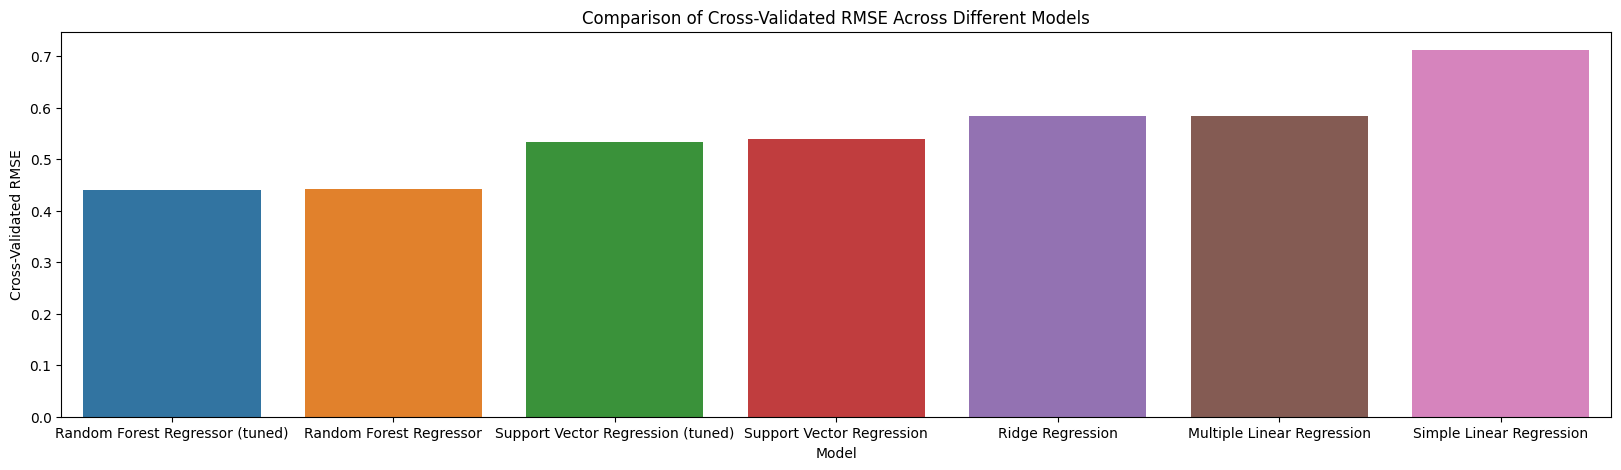

In [ ]:
plt.figure(figsize=(20, 5))

sorted_models = models_table.sort_values(by='Cross-Validated RMSE')
sns.barplot(x='Model', y='Cross-Validated RMSE', data=sorted_models)
plt.title("Comparison of Cross-Validated RMSE Across Different Models")


Based on the cross-validated RMSE plot for each model, Random Forest Regressor model has the lowest RMSE.

## Tuned Random Forest Regressor

Check the scatter plot between the actual and predicted house price.

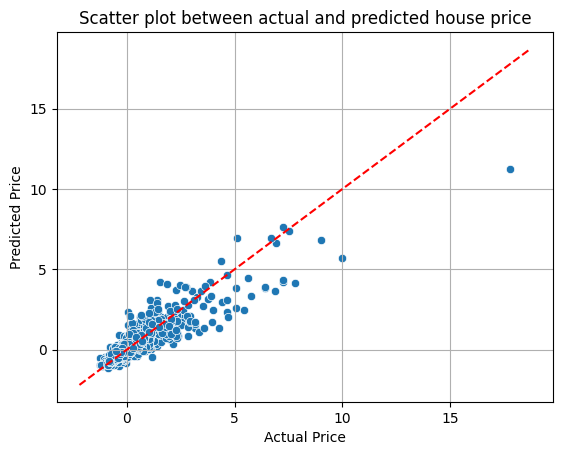

In [ ]:
predictions_rfm_tuned = rfm_tuned.predict(x_test)
sns.scatterplot(x=y_test, y=predictions_rfm_tuned)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Scatter plot between actual and predicted house price')
plt.grid()

# Add a dashed diagonal red line
limits = [np.min([plt.xlim(), plt.ylim()]), np.max([plt.xlim(), plt.ylim()])]  # find the limits of your data
plt.plot(limits, limits, color='red', linestyle='--')  # plot a diagonal line

plt.show()

Visualize the residual errors with residual plot.

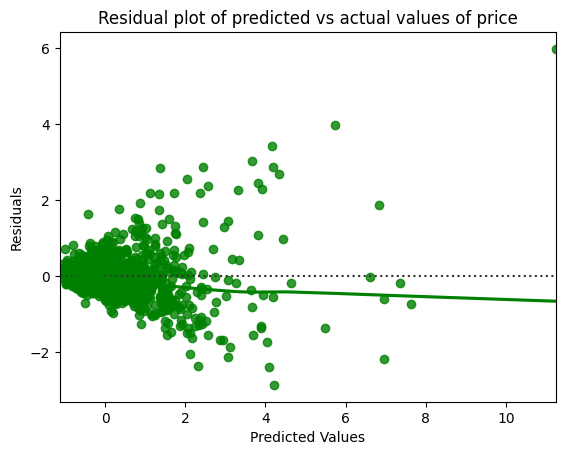

In [ ]:
residuals = y_test - predictions_rfm_tuned

sns.residplot(x=predictions_rfm_tuned, y=residuals, lowess=True, color="g")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual plot of predicted vs actual values of price')
plt.show()

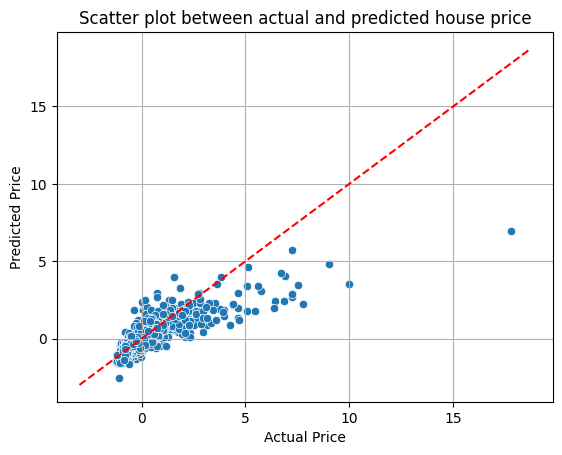

In [ ]:
predictions_mlr = mlr.predict(x_test)
sns.scatterplot(x=y_test, y=predictions_mlr)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Scatter plot between actual and predicted house price')
plt.grid()

# Add a dashed diagonal red line
limits = [np.min([plt.xlim(), plt.ylim()]), np.max([plt.xlim(), plt.ylim()])]  # find the limits of your data
plt.plot(limits, limits, color='red', linestyle='--')  # plot a diagonal line

plt.show()

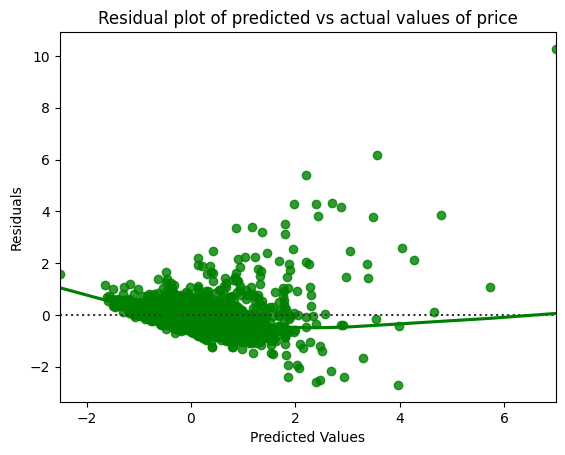

In [ ]:
residuals = y_test - predictions_mlr

sns.residplot(x=predictions_mlr, y=residuals, lowess=True, color="g")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual plot of predicted vs actual values of price')
plt.show()

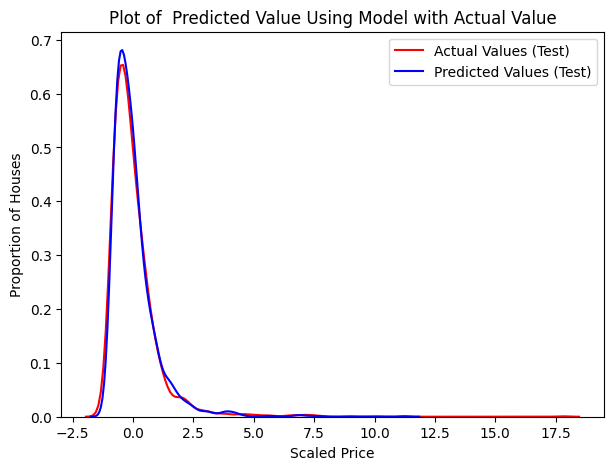

In [ ]:
plt.figure(figsize=(7, 5))
Title='Plot of  Predicted Value Using Model with Actual Value'
DistributionPlot(y_test,predictions_rfm_tuned,"Actual Values (Test)","Predicted Values (Test)",Title)

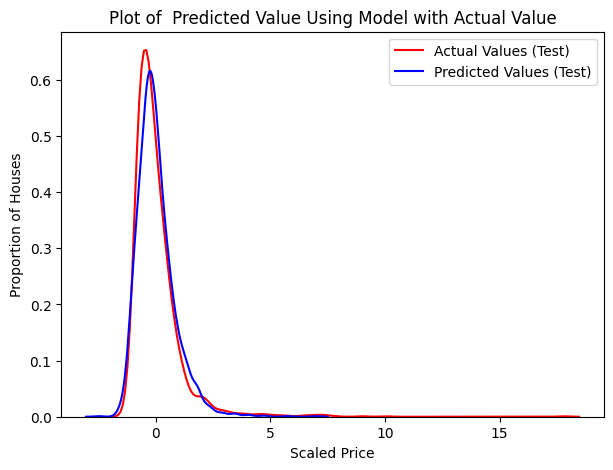

In [ ]:
plt.figure(figsize=(7, 5))
Title='Plot of  Predicted Value Using Model with Actual Value'
DistributionPlot(y_test,predictions_mlr,"Actual Values (Test)","Predicted Values (Test)",Title)